In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Kaggle Dataset의 animal face (분류 + GAN으로 동물 얼굴 생성)

In [3]:
import os
os.environ['KAGGLE_USENAME'] = "penguin1109"
os.environ['KAGGLE_KEY'] = "f46aaeaa8d716899683de47b6406fa07"

In [4]:
import kaggle

### 이미지 CLASS 분류

#### 1. 분류
1. 데이터 로딩
    - kaggle api를 이용하면 데이터셋을 쉽게 다운 받을 수 있다.
    - 이 데이터는 cat, dog, wild로 나누어진 이미지 데이터를 가지고 있으며, 이를 이용해서 3개의 class로 나누어서 학습하는 과정을 진행해 보고자 한다.
    - 저장 경로는 아래와 같다.  
        1. train / (cat, dog, wild) / 이미지들  
        2.val / (cat, dog, wild) / 이미지들  
    - 이미지 전처리를 해야 하기 때문에 ImageDataGenerator을 사용해서 flow_from_directory로 진행할지 (이미 저장 경로가 class별로 분류가 되어 있기 때문에 이렇게 진행하면 편할 것이라고 생각한다.)
    - 아니면 tf.data.Dataset을 이용해도 되지만 어차피 이미지 read_file과 resize등의 과정은 cv2로도 충분히 가능하기 때문에 굳이 그렇게 할 필요는 없을 것이라고 생각한다.
  

In [7]:
!kaggle datasets download -d andrewmvd/animal-faces


  0%|          | 0.00/696M [00:00<?, ?B/s]
  0%|          | 2.00M/696M [00:00<00:37, 19.3MB/s]
  0%|          | 3.00M/696M [00:00<01:39, 7.30MB/s]
  1%|          | 5.00M/696M [00:00<01:20, 9.00MB/s]
  1%|1         | 7.00M/696M [00:00<01:17, 9.31MB/s]
  1%|1         | 10.0M/696M [00:01<01:37, 7.38MB/s]
  2%|1         | 12.0M/696M [00:01<02:04, 5.75MB/s]
  2%|2         | 15.0M/696M [00:02<01:35, 7.51MB/s]
  2%|2         | 17.0M/696M [00:02<01:29, 7.91MB/s]
  3%|2         | 19.0M/696M [00:02<01:54, 6.22MB/s]
  3%|3         | 21.0M/696M [00:03<02:34, 4.57MB/s]
  3%|3         | 23.0M/696M [00:03<02:21, 4.99MB/s]
  4%|3         | 25.0M/696M [00:04<02:18, 5.09MB/s]
  4%|3         | 27.0M/696M [00:04<02:30, 4.65MB/s]
  4%|4         | 30.0M/696M [00:04<01:54, 6.10MB/s]
  5%|4         | 33.0M/696M [00:05<01:55, 6.04MB/s]
  5%|5         | 35.0M/696M [00:05<02:08, 5.39MB/s]
  5%|5         | 37.0M/696M [00:06<01:54, 6.02MB/s]
  6%|5         | 39.0M/696M [00:06<01:58, 5.79MB/s]
  6%|5         | 41.

 28%|##7       | 192M/696M [00:20<00:23, 22.2MB/s]
 28%|##8       | 195M/696M [00:20<00:27, 19.4MB/s]
 28%|##8       | 198M/696M [00:20<00:24, 21.5MB/s]
 29%|##8       | 201M/696M [00:21<00:39, 13.1MB/s]
 29%|##9       | 204M/696M [00:21<00:32, 15.8MB/s]
 30%|##9       | 208M/696M [00:21<00:27, 18.6MB/s]
 30%|###       | 211M/696M [00:22<00:39, 12.8MB/s]
 31%|###       | 214M/696M [00:22<00:33, 15.2MB/s]
 31%|###1      | 217M/696M [00:22<00:42, 11.7MB/s]
 32%|###1      | 220M/696M [00:22<00:35, 13.9MB/s]
 32%|###2      | 223M/696M [00:22<00:30, 16.0MB/s]
 32%|###2      | 226M/696M [00:23<00:36, 13.6MB/s]
 33%|###2      | 229M/696M [00:23<00:30, 16.2MB/s]
 33%|###3      | 233M/696M [00:23<00:41, 11.6MB/s]
 34%|###3      | 236M/696M [00:24<00:34, 14.2MB/s]
 34%|###4      | 239M/696M [00:24<00:28, 17.0MB/s]
 35%|###4      | 242M/696M [00:24<00:41, 11.6MB/s]
 35%|###5      | 245M/696M [00:24<00:33, 14.0MB/s]
 36%|###5      | 248M/696M [00:24<00:28, 16.6MB/s]
 36%|###6      | 251M/696M [00:

- 압축 zip파일로 저장이 되어 있어서 'H:\\'라는 저장소에 따로 zipfile 모듈을 이용해서 압축을 풀어 주었다.

In [15]:
import zipfile
animal_zip = zipfile.ZipFile("C:\\Users\\이지혜\\animal-faces.zip")
animal_zip.extractall('H:\\')

#### 2. 이미지 사이즈 및 상태 확인하기

In [5]:
root_dir = 'H:\\afhq'
import pathlib
import cv2
root_dir = pathlib.Path(root_dir)
dir_list = list(root_dir.glob('*/*'))

In [6]:
dir_list

[WindowsPath('H:/afhq/train/cat'),
 WindowsPath('H:/afhq/train/dog'),
 WindowsPath('H:/afhq/train/wild'),
 WindowsPath('H:/afhq/val/cat'),
 WindowsPath('H:/afhq/val/dog'),
 WindowsPath('H:/afhq/val/wild'),
 WindowsPath('H:/afhq/test/cat'),
 WindowsPath('H:/afhq/test/dog'),
 WindowsPath('H:/afhq/test/wild')]

In [26]:
img_list = list(root_dir.glob('*/*/*'))

In [31]:
str(img_list[0]).split('\\')

['H:', 'afhq', 'train', 'cat', 'flickr_cat_000002.jpg']

In [25]:
def show_image(dir):
    img = cv2.imread(dir)
    img = cv2.resize(img, dsize = (224,224))
    img = img/255.0
    plt.imshow(img)

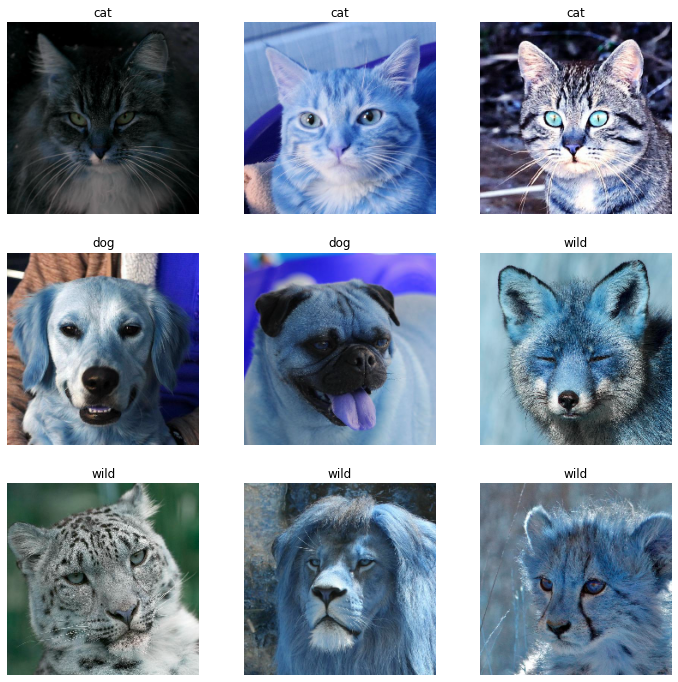

In [35]:
plt.figure(figsize = (12,12))
for _ in range(9):
    dir = str(img_list[_*2000])
    plt.subplot(3,3,_+1)
    show_image(dir)
    label = (dir.split('\\'))[-2]
    plt.title(label)
    plt.axis('off')

#### 3. 이미지 데이터와 클래스로 데이터셋 만들기
- ImageDataGenerator 이용
- train, test, valid dataset을 모두 만들어야 하는데 현재 저장 경로가 train, val밖에 없기 때문에 train data의 이미지를 옮겨서 test dataset을 만들거나 아니면 ImageDataGenerator에서 validation_rate를 설정해 주는 것도 괜찮다.
    - 그러나 이번에는 directory에서 데이터를 다루는 것을 연습해보기 위해서 test directory를 새롭게 만들어서 이미지를 올겨볼 생각이다.

In [41]:
import os
sub = os.listdir(os.path.join(root_dir,'train')) 

In [42]:
sub

['cat', 'dog', 'wild']

In [45]:
for i in sub:
    print(len(os.listdir(os.path.join(root_dir, 'train', i))))

5153
4739
4738


In [69]:
os.mkdir(os.path.join(root_dir, 'test'))

In [70]:
import shutil
for i in sub:
    dir = os.path.join(root_dir, 'test', i)
    os.mkdir(dir)
    train_file = list(pathlib.Path(os.path.join(root_dir, 'train', str(i))).glob('*'))
    for j in range(len(train_file)):
        if j <= 300:
            shutil.move(str(train_file[j]), os.path.join(dir,str(train_file[j]).split('\\')[-1]))

- validation data를 train data의 이미지에서 300개 이동해서 새로운 directory를 만들었다. 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0
)
val_datagen = ImageDataGenerator(
    rescale = 1/255.0
)
test_datagen = ImageDataGenerator(
    rescale = 1/255.0
)

- 메모리가 부족해서 어쩔 수 없이 grayscale, 즉 channel의 개수가 1이 되도록 바꾸어 주었다.

In [4]:
train_data = train_datagen.flow_from_directory(
    directory = "H:\\afhq\\train",
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'sparse',
    shuffle=True,
    color_mode = 'grayscale',
    seed=42
)
test_data = test_datagen.flow_from_directory(
    directory = "H:\\afhq\\test",
    target_size = (64,64),
    batch_size = 1,
    class_mode = 'sparse',
    shuffle=True,
    color_mode = 'grayscale',
    seed=42
)
val_data = val_datagen.flow_from_directory(
     directory = "H:\\afhq\\val",
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'sparse',
    shuffle=True,
    color_mode = 'grayscale',
    seed=42
)

Found 13727 images belonging to 3 classes.
Found 903 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [5]:
train_data.next()

(array([[[[0.29698214],
          [0.29123634],
          [0.31065407],
          ...,
          [0.28715312],
          [0.28627452],
          [0.28627452]],
 
         [[0.29698214],
          [0.29126075],
          [0.31072924],
          ...,
          [0.28588834],
          [0.28482667],
          [0.28480315]],
 
         [[0.30172065],
          [0.3025982 ],
          [0.3238003 ],
          ...,
          [0.28027314],
          [0.2785015 ],
          [0.27851328]],
 
         ...,
 
         [[0.24619368],
          [0.45651442],
          [0.30198753],
          ...,
          [0.04154452],
          [0.04206189],
          [0.04210889]],
 
         [[0.35468313],
          [0.5119196 ],
          [0.38893184],
          ...,
          [0.0531891 ],
          [0.05559494],
          [0.05573597]],
 
         [[0.41814852],
          [0.50020105],
          [0.49147466],
          ...,
          [0.11875857],
          [0.09480815],
          [0.09494918]]],
 
 
        [

#### 4. 모델 만들기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.activations import softmax, relu

In [7]:
model = Sequential()
model.add(Conv2D(input_shape = (64,64,1), padding = 'same', activation = 'relu', kernel_size = (2,2), filters = 32))
model.add(Conv2D(padding = 'same', activation ='relu', kernel_size = (2,2), filters = 64))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(padding = 'same', activation = 'relu', kernel_size = (2,2), filters = 128))
model.add(Conv2D(padding = 'same', activation = 'relu', kernel_size = (2,2), filters = 128))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       65664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
earl = EarlyStopping(monitor='val_accuracy', patience=10)
hist = model.fit_generator(train_data, validation_data = val_data, epochs = 50, callbacks = [earl])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 429 steps, validate for 47 steps
Epoch 1/50
429/429 [==============================] - 179s 418ms/step - loss: 0.8386 - accuracy: 0.6006 - val_loss: 0.5862 - val_accuracy: 0.7640
Epoch 2/50
429/429 [==============================] - 208s 484ms/step - loss: 0.5964 - accuracy: 0.7513 - val_loss: 0.4747 - val_accuracy: 0.8140
Epoch 3/50
429/429 [==============================] - 208s 484ms/step - loss: 0.4810 - accuracy: 0.8118 - val_loss: 0.3293 - val_accuracy: 0.8793
Epoch 4/50
429/429 [==============================] - 207s 483ms/step - loss: 0.3918 - accuracy: 0.8448 - val_loss: 0.4139 - val_accuracy: 0.8480
Epoch 5/50
429/429 [==============================] - 208s 484ms/step - loss: 0.3285 - accuracy: 0.8716 - val_loss: 0.3396 - val_accuracy: 0.8727
Epoch 6/50
429/429 [==============================] - 208s 484ms/step - loss: 0.3056 - accuracy: 0.88

In [11]:
model.evaluate(test_data)

  ...
    to  
  ['...']
903/903 [==============================] - 4s 5ms/step - loss: 0.5117 - accuracy: 0.8416


[0.5116858599495022, 0.841639]

### Accuracy = 84.16%

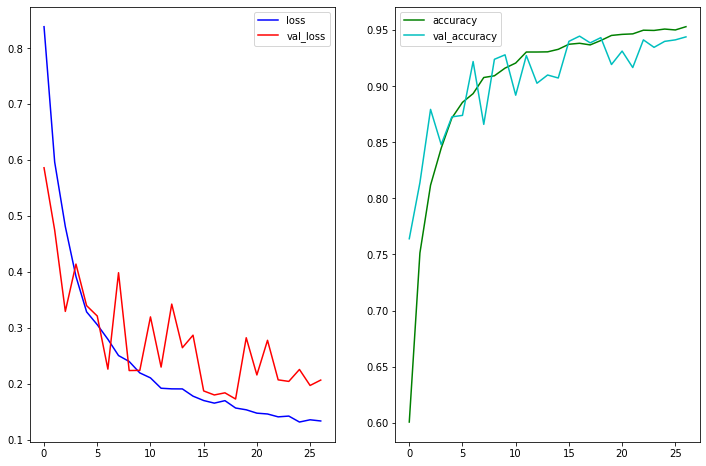

In [13]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label = 'loss')
plt.plot(hist.history['val_loss'], 'r-', label = 'val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'c-', label = 'val_accuracy')
plt.legend()

plt.show()

In [21]:
image_path = random.choice(test_data.filepaths)
img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize = (64,64))
img = img/255.0
img = np.expand_dims(img, axis= [0,-1])
pred = model.predict(img)
print(pred[::-1][0])

[1.1850835e-07 6.8923978e-09 9.9999988e-01]


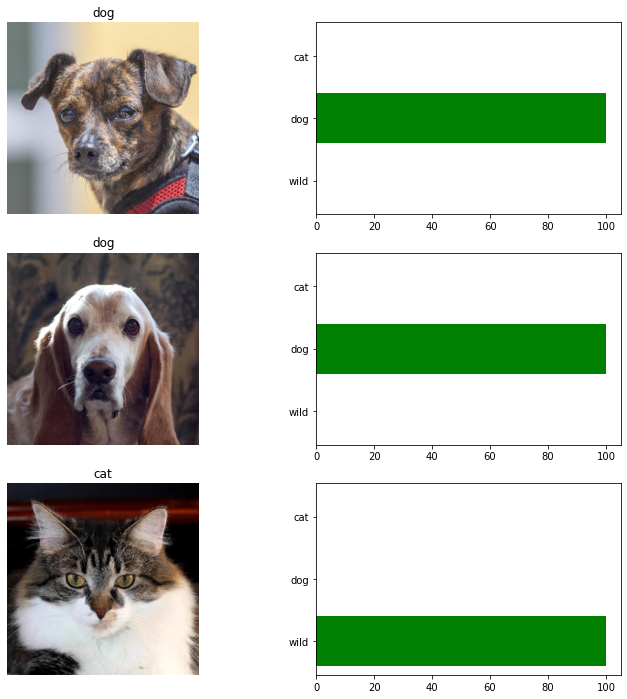

In [23]:
import random 
import cv2
plt.figure(figsize = (12,12))

for i in range(3):
    image_path = random.choice(test_data.filepaths)
    
    plt.subplot(3,2,i*2+1)
    plt.imshow(plt.imread(image_path))
    real_y = image_path.split('\\')[-2]
    plt.title(real_y)
    plt.axis('off')
    
    plt.subplot(3,2,i*2+2)
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, dsize = (64,64))
    img = img/255.0
    img = np.expand_dims(img, axis= [0,-1])
    
    pred = model.predict(img)
    label = ['cat', 'dog', 'wild']
    color = ['gray'] * 3
    if real_y in label:
        color[label.index(real_y)] = 'green'
    plt.barh(range(3), pred[::-1][0]*100, color = color)
    plt.yticks(range(3), label[::-1])
    
    

**거의 모델이 위의 3개를 예측한 결과를 보면 100%에 가깝게 예측을 하고 있음을 알 수 있다.**

### Animal Face GAN (Generative Adversarial Network)

1. Generator(생성자) 만들기
    - Dense layer (입력받는 random noise를 인식해야 함)
    - BatchNormalization layer
    - Reshape layer (CNN layer이 입력 받을 수 있도록 image의 형태로 바꿔주기)
    - Conv2D layer
    - UpSampling 2D layer / Conv2DTranspose layer
        - 입력받는 random tensor noise(추출된 특성이라고 생각하면 됨)를 이용해서 이미지를 새롭게 생성하는 역할
2. Discriminator(판별자) 만들기
    - Conv2D layer
    - Dropout layer
    - Dense layer
        - 입력받는 이미지의 label을 이용해 이미지의 진위 여부 판단
        - 처음에는 학습을 시키고 다음에 generator의 가중치를 갱신할 때, 즉 label을 잘못 연결 지을 때는 학습을 시키지 않는다.
- Keras의 함수형 API를 이용해서 모델을 설계하는 것이 제일 편하다.
- GAN이라는 Generator과 Discriminator을 합친 모델을 만들어서 결국 학습 시키는 것은 GAN이지만 그 내부에서 어떤 방법으로 train을 할 것인지는 직접 설계해야 한다.
- discriminator_loss, generator_loss 함수도 직접 만들어야 한다.
- 준비해야할 데이터는 이 경우에 분류가 아니기 때문에 그냥 train dataset에 있는 모든 **이미지 데이터**만 모아서 사용하면 된다.

In [2]:
import os, pathlib
path = ['H:\\afhq\\test\\cat',"H:\\afhq\\train\\cat",'H:\\afhq\\val\\cat']
data_path = pathlib.Path("H:\\afhq\\train\\cat")
x_path = []
for i in path:
    path = pathlib.Path(i)
    x_path.extend(list(path.glob('*')))

In [3]:
x_path = list(map(lambda x:str(x), x_path))

In [4]:
x_directory = tf.data.Dataset.from_tensor_slices(x_dir)

In [10]:
def load_image(image):
    img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(img)
    img = tf.image.resize(img, (64,64))
    img = tf.reshape(img, (-1,64,64,1))
    img = tf.cast(img, tf.float32)
    img = img/255.0
    return img

x_train = x_directory.map(load_image)

- 위의 코드는 tf.data.Dataset의 형태로 이미지 데이터를 저장하기 위해서 사용을 했고, 때문에 GAN에서 필요한 대로 각각의 이미지를 매번 불러오는 작업은 진행하기가 힘들다.
     - 그래서 take()함수를 이용해 볼까 했는데 그렇게 하면 원하는 index의 이미지를 불러 올 수 없었다.
- 그래서 새롭게 load_img함수를 정의해서 아예 모든 이미지 데이터의 array형태를 list에 모두 넣어 주었다.    

**dog, cat, wild데이터를 모두 사용하니 뭔가 학습이 잘 되지 않고 계속 흐릿한 상태만 계속 되었기 떄문에 cat의 train, test, val데이터만을 넣어 주었다. 그리고 내가 좀 hyperparameter 값이나 optimizer이나 activation함수를 바꾸었더니 더 학습이 안되는 느낌이어서 그냥 정석대로 DCGAN 논문에 나온 대로 바꾸어 주었다.**

In [4]:
import cv2
def load_img(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96,96))
    img = img/255.0
    img = (img-0.5)*2
    img = tf.cast(img, tf.float32)
    return img

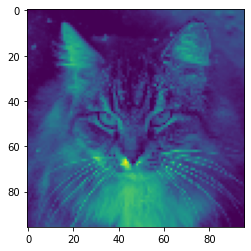

In [5]:
plt.imshow(load_img(x_path[0])/2+0.5)

- 위에서 이미지의 픽셀값을 -1에서 1사이로 바꾸어 주었는데 그 이유는 activation 함수로 tanh를 사용하였는데 tanh의 출력값 또한 -1에서 1 사이라서 이 값에 맞추어 주었다.

In [6]:
import random
random.shuffle(x_path)

In [7]:
len(x_path)

5653

In [8]:
x_img = []
for i in range(len(x_path)):
    x_img.append(load_img(x_path[i]))

In [9]:
x_img = np.array(x_img)
x_img = np.expand_dims(x_img, axis = -1)

In [10]:
x_img.shape

(5653, 96, 96, 1)

**훈련이 일반적인 반복이 아니기 때문에 fit()메서드를 사용할 수 없다. 따라서 훈련을 위해서 이미지를 순회하는 dataset을 만들어야 한다.**

In [11]:
x_dataset = tf.data.Dataset.from_tensor_slices(x_img)
x_dataset = x_dataset.batch(32, drop_remainder = True).prefetch(1)

In [12]:
x_dataset

<PrefetchDataset shapes: (32, 96, 96, 1), types: tf.float32>

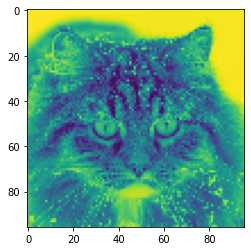

In [13]:
plt.imshow(x_img[0]/2+0.5)

- 이제 GAN에 입력될 실제 이미지 데이터가 모두 준비가 되었고, 물론 이미지의 화질을 위해서 이미지의 크기를 (224,224)로 설정한 것 때문에 데이터가 모자랄까봐 걱정이 되기는 하지만 이제 generator, discriminator layer을 만들고 GAN model 까지 설계를 하고 구현하면 된다.

#### 1. Generator (생성자) 만들기
- 입력값으로 먼저 Dense Layer이 random한 추출된 특징의 역할을 하는 데이터를 입력을 받아야 한다.
    - 이 입력값의 크기는 (픽셀 수 X 픽셀 수 X 채널 수)로 구성이 되도록 한다.
    - generator에서는 이미지를 계속 확장해 나가기 때문에 처음의 픽셀 수는 원래보다 작게 한다.
    - 처음 입력하는 noise,즉 잡음의 개수는 100개, param 수는 32로 설정할 것이다.
    

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Conv2D, Dropout, Conv2DTranspose, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid

- 처음에 결과값이 잘 나오지 않아서 코드를 다시 보니 첫번째 dense layer에 activation 함수를 설정해 주지 않았었다.
    - 활성화 함수는 특히 dense layer에서 중요한데 그 이유는 perceptron들이, 즉 뉴런들이 각각의 샘플을 입력받고 출력값으로 (X * 가중치 + 편향)을 함수에 넣은 y값을 내보내기 때문이다.
    - 이후에 이 값과 실제의 오차를 각각 가중치와 편향에 대해 미분해 그 gradient값에 따라서 어떻게 가중치와 편향을 오차를 줄일수 있는 방향으로 바꿀지 결정한다.
    - 만약 활성화 함수가 없다면 이는 '비선형성'을 확보하지 못하기 때문에 예측을 제대로 하기가 어렵다.

In [29]:
generator = Sequential()
generator.add(Dense((6*6*128),input_shape = [100], activation = tf.keras.layers.LeakyReLU(0.2)))
generator.add(Reshape([6,6,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
generator.add(Conv2DTranspose(64, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu'))
generator.add(Conv2DTranspose(1, kernel_size = 5, strides = 2, padding = 'same', activation = 'tanh'))

In [30]:
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4608)              465408    
_________________________________________________________________
reshape_2 (Reshape)          (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 12, 12, 64)        204864    
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 48, 48, 32)       

#### 2. Discriminator (판별자) 만들기

In [31]:
leaky = tf.keras.layers.LeakyReLU(0.2)
discriminator = Sequential()
discriminator.add(Conv2D(128, kernel_size = 5, strides = 2, padding = 'same', activation = leaky, input_shape = [96,96,1]))
discriminator.add(Conv2D(64, kernel_size = 5, strides = 2, padding = 'same', activation = leaky))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(32, kernel_size = 5, strides = 2, padding = 'same', activation = leaky))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation = 'sigmoid'))

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)
discriminator.compile(loss = 'binary_crossentropy', optimizer = optimizer)
discriminator.trainable = False

In [33]:
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 128)       3328      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        204864    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        51232     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4609      
Total params: 528,450
Trainable params: 264,161
Non-trainable params: 264,289
__________________________________________

#### 3. 전체 훈련시켜야 하는 모델 GAN을 keras 함수로 생성

In [34]:
gan = Sequential([generator, discriminator])

In [35]:
gan.compile(loss = 'binary_crossentropy', optimizer = optimizer)

In [36]:
gan.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 96, 96, 1)         825537    
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 264289    
Total params: 1,089,826
Trainable params: 825,153
Non-trainable params: 264,673
_________________________________________________________________


#### 4. 훈련 과정 함수 만들기

In [54]:
def plot_multiple(img, i):
    plt.figure(figsize = (12,8))
    count = 0
    for index, image in enumerate(img):
        if index % 32 == 0 and count <= 31:
            plt.subplot(4, 8, count + 1)
            count += 1
            image = np.squeeze(image, axis = -1)
            plt.imshow(np.asarray(image)/2+0.5, cmap = 'gray')
            plt.axis('off')
    plt.show()

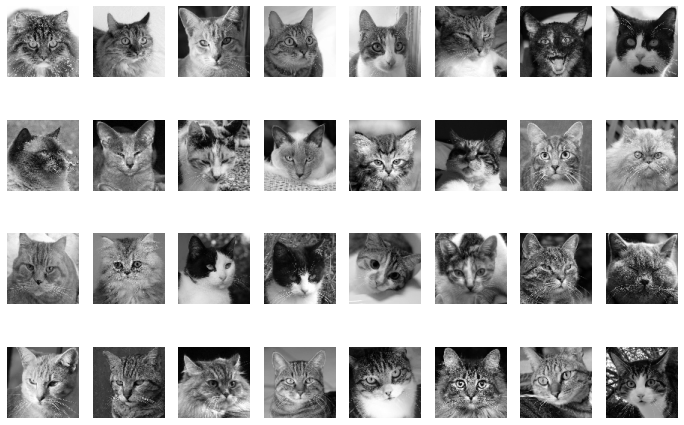

In [55]:
plot_multiple(x_img, 0)

In [39]:
batch_size = 32
coding_size = 100
import IPython.display as display

def train_step(gan, dataset, batch_size, coding_size, n_epochs):
    generator, discriminator = gan.layers
    for i in range(n_epochs):
        generated = []
        print('Epoch {}/{}'.format(i+1,n_epochs))
        for batch in dataset:
            noise = tf.random.normal(shape = [batch_size, coding_size])
            fake_img = generator(noise)
            for idx, img in enumerate(fake_img):
                generated.append(img)
            fake_and_real = tf.concat([fake_img, batch], axis = 0)
            y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(fake_and_real, y1)
        
            noise = tf.random.normal(shape = [batch_size, coding_size])
            y2 = tf.constant([[1.]]*batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        display.clear_output(wait = True)
        plot_multiple(generated, i)
        
            
                

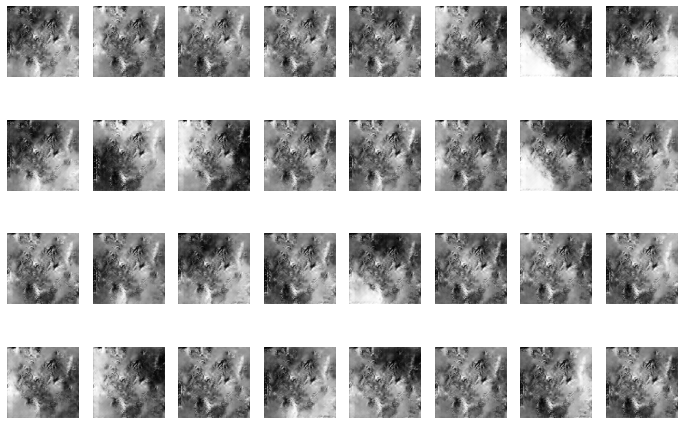

In [40]:
train_step(gan, x_dataset, batch_size, coding_size, 100)

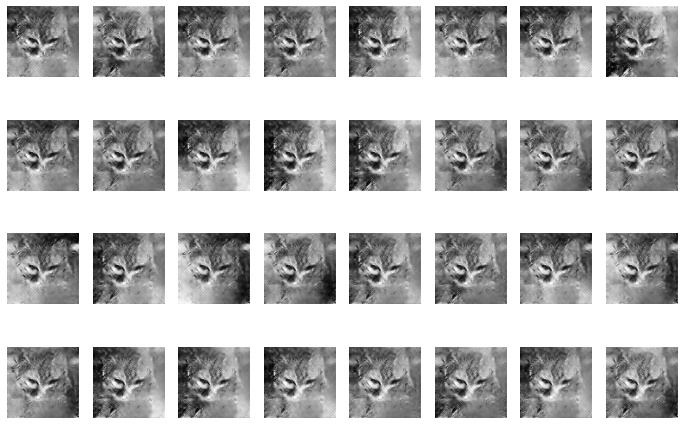

In [56]:
train_step(gan, x_dataset, batch_size, coding_size, 50)

- 계속해서 픽셀값과 이미지의 크기, 활성화 함수 등 채널 수에 변화를 주었는데 계속해서 출력값에 변화가 별로 없다는 느낌이 들었다. 
- 일단 이미지의 크기가 크면 더욱더 generator layer이 일반화하기 힘들 것 같다는 생각이 들어서 처음에 112로 했다가 196으로 바꾸었는데, 그 이상은 바꿀 수 없었던 이유가(64로 하려 했는데 너무 화질이 안좋아졌다.)
    - 그리고 이미지 픽셀 크기 설정을 해 줄때 upsampling을 해서 원하는 이미지의 크기로 바꾸어 주어야 하기 때문에 이왕이면 3의 배수, 2의 배수 등과 같이 쉽게 곱셈으로 나오는 크기로 설정해 주는 것이 좋다.
- 그리고 convolution layer들의 filter 수 또한 늘리려고 노력을 했다. 
- 마지막으로 loss함수도 원래 쓰던 binary_crossentropy에서 mean_squared_error로 바꾸어 주었는데 생각해 보니 mean_squared_error은 적합치 않아 보여서 다시 binary_crossentropy로 바꿔 주었다.
    - 연속적 분포를 갖는 regression에는 mean_squared_error이 적합하고 이산적인 분포를 갖는 classification에는 cross_entropy가 적합하다는 말이 있는데 딥러닝의 경우에 뭐든 확답을 할 수 없다는 점이 어렵게 만드는 것 같다.
    - 논문을 읽어보면 연구자들도 초고성능의 GPU를 이용해서 몇십일이 걸리도록 학습을 한다고 하니 결과가 제대로 나오는 것이 너무 어려운게 당연한가 싶다.
    
- 위에 내가 작성한 DCGAN의 구조는 기본적으로는 DCGAN 논문에 나오는 guideline을 따르기는 하지만 일부 하이퍼 파라미터에 당연히 변화를 준 것은 맞다. 
- 그리고 나는 이미지가 선명하고 크기가 클수록 더 제대로 된 이미지가 나올 것이라고 생각했었는데 따지고 보면 그렇게 이미지의 크기가 크다는 것은 **네트워크가 인식하고 학습해야 하는 데이터의 수가 많다**는 것이기 때문에 잘못된 생각이었던 것 같다.
    - 실제로 96으로 크기를 바꾸고 오히려 필터의 수를 늘렸더니 학습이 훨씬 더 잘된 느낌이었다.
        - 또한, 제일 중요한 것은 kernel_size를 바꿔 준 것이었는데 원래 는 kernel_size와 stride 모두 2로 했다면 이번에는 큼직하게 kernel_size를 5로 바꿔 주었다.(어차피 stride의 크기만이 이미지의 크기에 영향을 미친다.)
       


### DCGAN hyperparameter 정리
1. Generator
    - input_shape [6x6x128] 크기의 100개의 noise 데이터를 입력받음 (변환하고자 하는 이미지는 96x96x1의 크기를 갖는다.)
    - Reshape Layer을 이용해서 convolution layer에 넣을 수 있게끔 (6,6,128)의 크기로 바꾸어 준다.
    - 이후 BatchNormalization을 진행해 주고 Condv2DTranspose Layer을 이용한다.
    - Conv2DTranspose는 kernel_size는 5, strides는 2로 설정해서 점점 2배씩 이미지의 길이를 늘려간다.
        - 활성화 함수는 마지막 층 제외 LeaykyReLU를 사용한다
        - 마지막 Conv2DTranspose 층은 활성화 함수로 tanh를 이용한다.(그래서 출력값의 범위가 -1에서 1사이)
2. Discriminator        
    - Conv2DLayer을 이용해서 128, 64, 32순으로 필터 사이즈를 줄여 나가며 학습을 한다.
        - 활성화 함수는 LeakyReLU를 사용한다.
    - 마지막에는, 결국 이진 탐색이기 때문에 Dense layer를 사용해서 channel size는 1로 설정한다.
        - 활성화 함수는 sigmoid를 사용한다.
3. GAN
    - Sequential([generator, discriminator])
4. Compile Hyperparameter
    - Discriminator
        - loss = binary_crossentropy
        - optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5)
    - Gan
        - loss = binary_crossentory
        - optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5)
5. train
    - train_step 함수를 정의해서 이를 이용함
        - random_noise를 생성해서 이를 generator에 넣어서 나온 출력값을 label 0을 하고 진짜 이미지를 label 1로 설정해 'trainable = True'인 discriminator에 넣어 학습을 시키고
        - random_noise로 한번 더 gan에 넣어서 label 1로 설정해 discriminator을 'trainable = False'로 바꿔 준 뒤에 학습한다.
            - generator이 같이 있는 gan모델에 넣는 것이기 때문에 이번에는 generator모델이 학습이 된다.(실제 이미지와 최대한 같아지도록 학습이 된다.)